In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [2]:
import mlrose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import process_time

In [4]:
print("Running FlipFlop...")

fitness = mlrose.FlipFlop()
problem = mlrose.DiscreteOpt(100, fitness)

RANDOM_SEED = 42
MAX_ATTEMPTS = 100

#%% tuning for SA
curve_list = []
decays = [0.999, 0.99, 0.9]
for d in decays:
    schedule = mlrose.GeomDecay(decay=d)
    _, _, curve = mlrose.simulated_annealing(
        problem,
        schedule=schedule,
        max_attempts=MAX_ATTEMPTS,
        max_iters=500,
        curve=True,
        random_state=RANDOM_SEED,
    )
    curve_list.append(curve)
    
df = pd.DataFrame(curve_list).transpose()
df.columns = decays
df.plot()
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("FlipFlop: Fitness curve vs decay rate in SA")
plt.savefig("output/flipflop_sa_decay.png")
plt.close()

print(df.max())

Running FlipFlop...
0.999    81.0
0.990    90.0
0.900    89.0
dtype: float64


/Users/chux/Desktop/mlrose/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


In [5]:
#%% tuning for GA
curve_list = []
pop_sizes = [50, 100, 200, 400]
for p in pop_sizes:
    _, _, curve = mlrose.genetic_alg(
        problem,
        max_attempts=MAX_ATTEMPTS,
        max_iters=500,
        pop_size=p,
        curve=True,
        random_state=RANDOM_SEED,
    )
    curve_list.append(curve)

df = pd.DataFrame(curve_list).transpose()
df.columns = pop_sizes
df.plot()
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("FlipFlop: Fitness curve vs population size in GA")
plt.savefig("output/flipflop_ga_pop.png")
plt.close()

print(df.max())

50     69.0
100    71.0
200    72.0
400    72.0
dtype: float64


In [6]:
#%% tuning for MIMIC
curve_list = []
nth_pct = [0.2, 0.4]
for p in nth_pct:
    _, _, curve = mlrose.mimic(
        problem,
        max_attempts=MAX_ATTEMPTS,
        max_iters=50,
        keep_pct=p,
        curve=True,
        random_state=RANDOM_SEED,
    )
    curve_list.append(curve)

df = pd.DataFrame(curve_list).transpose()
df.columns = nth_pct
df.plot()
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("FlipFlop: Fitness curve vs nth percentile in MIMIC")
plt.savefig("output/flipflop_mimic_nth.png")
plt.close()

print(df.max())



0.2    89.0
0.4    88.0
dtype: float64


In [7]:
#%% Putting together
curve_list = []
time_list = []
n_eval = []
algo_list = ["RHC", "SA", "GA", "MIMIC"]

# RHC
t1 = process_time()
_, _, curve = mlrose.random_hill_climb(
    problem,
    max_attempts=MAX_ATTEMPTS,
    max_iters=500,
    curve=True,
    random_state=RANDOM_SEED,
)
t2 = process_time()
time_list.append((t2 - t1) / len(curve))
curve_list.append(curve)
n_eval.append(np.argmax(curve) + 1)

# SA
t1 = process_time()
_, _, curve = mlrose.simulated_annealing(
    problem,
    max_attempts=MAX_ATTEMPTS,
    max_iters=500,
    curve=True,
    random_state=RANDOM_SEED,
)
t2 = process_time()
time_list.append((t2 - t1) / len(curve))
curve_list.append(curve)
n_eval.append(np.argmax(curve) + 1)

# GA
t1 = process_time()
_, _, curve = mlrose.genetic_alg(
    problem, max_attempts=MAX_ATTEMPTS, curve=True, random_state=RANDOM_SEED,
)
t2 = process_time()
time_list.append((t2 - t1) / len(curve))
curve_list.append(curve)
n_eval.append((np.argmax(curve) + 1) * 200)

# MIMIC
t1 = process_time()
_, _, curve = mlrose.mimic(
    problem,
    max_attempts=MAX_ATTEMPTS,
    keep_pct=0.4,
    curve=True,
    random_state=RANDOM_SEED,
)
t2 = process_time()
time_list.append((t2 - t1) / len(curve))
curve_list.append(curve)
n_eval.append((np.argmax(curve) + 1) * 200)

df = pd.DataFrame(curve_list).transpose()
df.columns = algo_list
df.plot()
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("FlipFlop: Fitness curve vs algorithms")
plt.savefig("output/flipflop_algo.png")
plt.close()

print("time per iteration:")
print(time_list)
print("number of func eval reaching maxima:")
print(n_eval)
print("maxima reached:")
print(df.max())

time per iteration:
[5.9032710280610945e-05, 6.984799999997903e-05, 0.024140107843137467, 4.519329533834587]
number of func eval reaching maxima:
[114, 212, 20800, 6600]
maxima reached:
RHC      82.0
SA       90.0
GA       72.0
MIMIC    88.0
dtype: float64


In [1]:
time_per_iteration=[5.9032710280610945e-05, 6.984799999997903e-05, 0.024140107843137467, 4.519329533834587]
X=['RHC','SA','GA','MIMIC']

In [2]:
import matplotlib.pyplot as plt

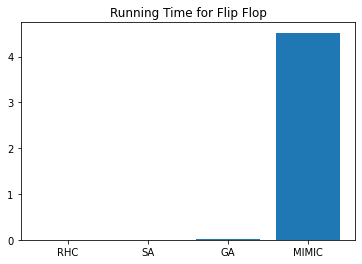

In [3]:
plt.bar(X,time_per_iteration)
plt.title('Running Time for Flip Flop')
plt.show()